# Features - Solvers
Documentation Link: https://docs.sympy.org/latest/tutorials/intro-tutorial/solvers.html

In [4]:
import sympy as sp
sp.init_printing(use_unicode=True)

In [5]:
x, y, z = sp.symbols('x y z')

## [A Note about Equations](https://docs.sympy.org/latest/tutorials/intro-tutorial/solvers.html#a-note-about-equations)

In [6]:
display(sp.Eq(x**2, 1), sp.solveset(sp.Eq(x**2, 1), x), 
        sp.solveset(sp.Eq(x**2 - 1, 0), x), sp.solveset(x**2 - 1, x))


## [Solving Equations Algebraically](https://docs.sympy.org/latest/tutorials/intro-tutorial/solvers.html#solving-equations-algebraically)

In [7]:
display(sp.solveset(x**2 - x, x), sp.solveset(x - x, x, domain= sp.S.Reals),
        sp.solveset(sp.sin(x) - 1, x, domain= sp.S.Reals))

display(sp.solveset(sp.exp(x), x), 'no solution',
         sp.solveset(sp.cos(x)-x, x), 'not able to find solution')

⎧        π │      ⎫
⎨2⋅n⋅π + ─ │ n ∊ ℤ⎬
⎩        2 │      ⎭

'no solution'

{x │ x ∊ ℂ ∧ (-x + cos(x) = 0)}

'not able to find solution'

A System of Linear Equations (**`linsolve`**):
$$ x + y + z = 1 $$
$$ x + y + 2z = 3 $$

In [8]:
display('List of Equations Form:',
    sp.linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z)))
display('Augmented Matrix Form', sp.Matrix(([1,1,1,1], [1,1,2,3])),
    sp.linsolve(sp.Matrix(([1,1,1,1], [1,1,2,3])), (x, y, z)))

M = sp.Matrix(((1, 1, 1, 1), (1, 1, 2, 3)))
A, b = M[:, :-1], M[:, -1]
display('A*x=b Form', sp.linsolve([A, b], x, y, z))

'List of Equations Form:'

'Augmented Matrix Form'

⎡1  1  1  1⎤
⎢          ⎥
⎣1  1  2  3⎦

'A*x=b Form'

Nonlinear system of equations (**`nonlinsolve`**):

In [13]:
a, b, c, d = sp.symbols('a b c d', real=True)

display('only real solution', sp.nonlinsolve([a**2+a, a-b], [a, b]),
        'only complex solution', sp.nonlinsolve([x**2+1, y**2+1], [x,y]),
        'real and complex', sp.nonlinsolve([x**2-x*y**2-2, x*y-2], [x,y]),
        sp.nonlinsolve([sp.exp(x)-sp.sin(y), 1/y -3], [x,y]),
        'infinitely many solutions', sp.nonlinsolve([x*y, x*y - x], [x, y]),
        sp.nonlinsolve([a**2+a*c, a-b], [a,b]))


'only real solution'

'only complex solution'

'real and complex'

{({2⋅n⋅ⅈ⋅π + log(sin(1/3)) │ n ∊ ℤ}, 1/3)}

'infinitely many solutions'

**Limitations:**
* Currently `nonlinsolve` doesn’t return solution in form of LambertW (if there is solution present in the form of LambertW). `solve` can be used for such cases.
* Equations solvable by LambertW (Transcendental equation solver).
*  Currently `nonlinsolve` is not properly capable of solving the system of equations having trigonometric functions. `solve` can be used for such cases (but does not give all solution).

In [18]:
display(sp.solve([x**2 - y**2/sp.exp(x)], [x, y], dict=True),
            sp.solve(x**2 - y**2/sp.exp(x), x, dict=True), 
            sp.solve(x*sp.exp(x) - 1, x ),
            'trigonometric', sp.solve([sp.sin(x + y), sp.cos(x - y)], [x, y]))

'trigonometric'

In [16]:
display(sp.solveset(x**3 - 6*x**2 + 9*x, x),
        sp.roots(x**3 - 6*x**2 + 9*x, x))

The output {0: 1, 3: 2} of roots means that 0 is a root of multiplicity 1 and 3 is a root of multiplicity 2.

## [Solving Differential Equations](https://docs.sympy.org/latest/tutorials/intro-tutorial/solvers.html#solving-differential-equations)

f

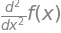

In [19]:
f, g = sp.symbols('f g', cls=sp.Function)
display(f, f(x).diff(x, 2))

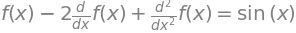

'solution'

'solution'

In [22]:
diffeq1 = sp.Eq(f(x).diff(x,2) -2*f(x).diff(x) +f(x), sp.sin(x))
display(diffeq1, 'solution', sp.dsolve(diffeq1, f(x)))
diffeq2 = g(x).diff(x)*(1 -sp.sin(g(x))) -1
display(diffeq2, 'solution', sp.dsolve(diffeq2, g(x)))